# AlexNet Artitecture

AlexNet is a convolutional neural network (CNN) architecture that was proposed by Alex Krizhevsky and his colleagues in 2012 in their research paper named Imagenet Classification with Deep Convolution Neural Network. The model won the Imagenet large-scale visual recognition challenge in 2012 and is considered a leading architecture for pre-trained models in the Computer Vision domain.

The AlexNet architecture consists of eight layers, with five convolutional layers followed by three fully connected layers. The input to the model is an image of size 227X227X3. One thing to note here is that since AlexNet is a deep architecture, the authors introduced padding to prevent the size of the feature maps from reducing drastically.

AlexNet uses Rectified Linear Units (ReLU) as a non-linear activation function instead of the tanh function, which was standard at the time. Using ReLU as an activation function accelerated the speed of the training process by almost six times. ReLU activation is performed at the end of each layer, except for the last one, which outputs with a softmax with a distribution over the 1000 class labels.

AlexNet uses max-pooling after the first, second, and fifth convolutional layers. CNNs traditionally “pool” outputs of neighboring groups of neurons with no overlapping. However, when the authors introduced overlap, they saw a reduction in error by about 0.5% and found that models with overlapping pooling generally find it harder to overfit.

The neurons in the fully connected layers are connected to all neurons in the previous layer. After the convolutional layers, AlexNet has two dropout layers. The dropout rate is set to be 0.5. Then there is the first fully connected layer with a ReLU activation function. The size of the output is 4096. This is followed by another dropout layer with the dropout rate fixed at 0.5. Then there is a second fully connected layer with 4096 neurons and ReLU activation. Finally, there is the last fully connected layer or output layer with 1000 neurons as there are 1000 classes in the Imagenet dataset. The activation function used at this layer is Softmax.

AlexNet had 60 million parameters, which was a major issue in terms of overfitting. Two methods were employed to reduce overfitting. First, the authors used data augmentation by generating image translations and horizontal reflections, which increased the training set by a factor of 2048. They also performed Principle Component Analysis (PCA) on the RGB pixel values to change the intensities of RGB channels, which reduced the top-1 error rate by more than 1%. Second, the authors used a technique called dropout, which consists of “turning off” neurons with a predetermined probability (e.g. 50%). This means that every iteration uses a different sample of the model’s parameters, which forces each neuron to have more robust features that can be used with other random neurons. However, dropout also increases the training time needed for the model’s convergence.

AlexNet was trained on a GTX 580 GPU with only 3 GB of memory, which couldn’t fit the entire network. So the network was split across 2 GPUs, with half of the neurons (feature maps) on each GPU. This is the reason one can see a split in the architecture diagram.

The unique advantage of AlexNet is the direct image input to the classification model. The convolution layers can automatically extract the edges of the images, and fully connected layers learn these features. Many methods, such as the conv+pooling design, dropout, GPU, parallel computing, ReLU, are still the industrial standard for computer vision.

In conclusion, the AlexNet architecture consists of eight layers, with five convolutional layers followed by three fully connected layers. It uses ReLU activation, max-pooling, and dropout techniques to reduce overfitting. AlexNet was trained on a GPU using data augmentation and PCA to make the data more varied. The model has 62.3 million learnable parameters and is considered a leading architecture for pre-trained models in the Computer Vision domain.

In [ ]:
# install package
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## AlexNet Layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers

model = keras.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11),
                        strides=(4, 4), activation="relu",
                        input_shape=(227, 227, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

## Layers Visulization

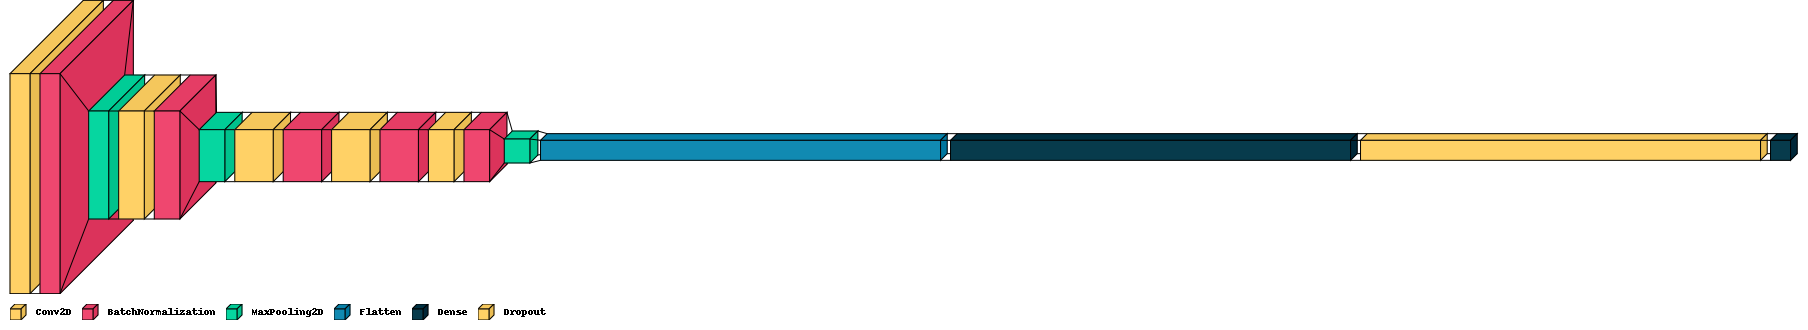

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True)